# **TENSORFLOW PRACTICE 3** - Linear Regression and Gradient Descent

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **Simple linear regression**

In [0]:
x_data = np.float32(np.random.rand(1,100))
W_true = 0.3
b_true = 0.2
y_data = np.dot([W_true], x_data) + b_true

In [244]:
print(x_data)

[[0.6632241  0.37071165 0.6864714  0.30515108 0.91369295 0.12955654
  0.3152662  0.3194518  0.94851583 0.96154153 0.85230166 0.1671658
  0.9936949  0.7360542  0.22702    0.7623927  0.54875124 0.42818308
  0.67478967 0.5204219  0.71685255 0.99080205 0.4873828  0.9023527
  0.08871285 0.15404205 0.07516748 0.5046148  0.55644435 0.5682289
  0.5629851  0.729199   0.9764374  0.977779   0.7364967  0.24823909
  0.2510371  0.01652958 0.95159787 0.23619789 0.16293333 0.7547333
  0.17401175 0.6848751  0.8254503  0.34704852 0.39747983 0.03426387
  0.37350437 0.48224753 0.3717537  0.2010599  0.72267324 0.88007563
  0.39645985 0.04863751 0.409633   0.93050677 0.98749185 0.06276414
  0.848611   0.29431975 0.35984764 0.41795596 0.48848924 0.22476608
  0.58457834 0.08978    0.5229144  0.90070355 0.08443277 0.741753
  0.8687029  0.15974578 0.27073935 0.11184094 0.12101041 0.10813779
  0.51640165 0.96180344 0.5423858  0.28717402 0.85348094 0.71110874
  0.78820413 0.4674899  0.7440195  0.7239682  0.143704

In [245]:
print(y_data)

[0.39896723 0.3112135  0.40594142 0.29154532 0.47410789 0.23886696
 0.29457986 0.29583554 0.48455475 0.48846246 0.4556905  0.25014974
 0.49810847 0.42081625 0.268106   0.42871781 0.36462537 0.32845492
 0.4024369  0.35612658 0.41505576 0.49724061 0.34621484 0.47070581
 0.22661385 0.24621262 0.22255025 0.35138443 0.3669333  0.37046867
 0.36889554 0.4187597  0.49293122 0.49333369 0.42094901 0.27447173
 0.27531113 0.20495888 0.48547936 0.27085937 0.24888    0.42642
 0.25220353 0.40546252 0.44763509 0.30411456 0.31924395 0.21027916
 0.31205131 0.34467426 0.31152611 0.26031797 0.41680197 0.46402269
 0.31893795 0.21459125 0.3228899  0.47915203 0.49624755 0.21882924
 0.4545833  0.28829592 0.30795429 0.32538679 0.34654677 0.26742982
 0.3753735  0.226934   0.35687432 0.47021106 0.22532983 0.42252589
 0.46061087 0.24792373 0.2812218  0.23355228 0.23630312 0.23244134
 0.35492049 0.48854103 0.36271574 0.2861522  0.45604428 0.41333262
 0.43646124 0.34024697 0.42320585 0.41719046 0.24311145 0.2191653

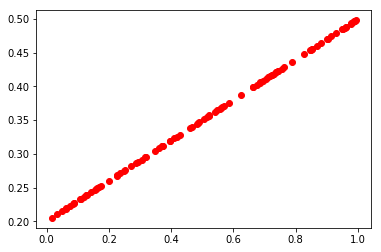

In [246]:
"""Scatter plot of x vs y"""
plt.plot(x_data.tolist()[0], y_data.tolist(), 'ro')
plt.show()

In [0]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1],-1,1))

y = tf.matmul([W], x_data) + b
loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

In [248]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
n = 500
for step in range(n):
  sess.run(train)
  if step == 0:
    W_pred = sess.run(W)
    b_pred = sess.run(b)
    y_init = np.dot([W_pred], x_data) + b_pred
    print("Step: ", step, "|| W = ", W_pred[0], "|| b = ", b_pred[0])
  elif step == (n-1):
    W_pred = sess.run(W)
    b_pred = sess.run(b)
    y_pred = np.dot([W_pred], x_data) + b_pred
    print("Step: ", step, "|| W = ", W_pred[0], "|| b = ", b_pred[0])
  elif step%20 == 0:
    print("Step: ", step)

Step:  0 || W =  -0.48080233 || b =  0.13007358
Step:  20
Step:  40
Step:  60
Step:  80
Step:  100
Step:  120
Step:  140
Step:  160
Step:  180
Step:  200
Step:  220
Step:  240
Step:  260
Step:  280
Step:  300
Step:  320
Step:  340
Step:  360
Step:  380
Step:  400
Step:  420
Step:  440
Step:  460
Step:  480
Step:  499 || W =  0.29943883 || b =  0.20031415


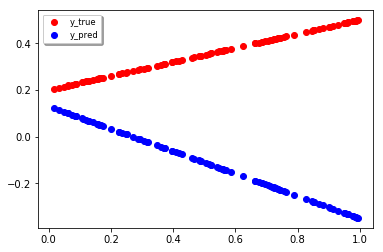

In [249]:
"""Scatter plot of x vs y prediction with the initialization value of the parameter"""
plt.plot(x_data.tolist()[0], y_data.tolist(), 'ro', label = 'y_true')
plt.plot(x_data.tolist()[0], y_init.tolist()[0], 'bo', label = 'y_pred')

plt.legend(loc='upper left', shadow=True, fontsize='small')

plt.show()

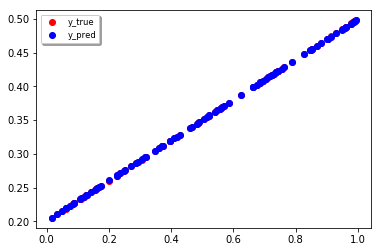

In [250]:
"""Scatter plot of x vs y prediction with the converged parameter"""
plt.plot(x_data.tolist()[0], y_data.tolist(), 'ro', label = 'y_true')
plt.plot(x_data.tolist()[0], y_pred.tolist()[0], 'bo', label = 'y_pred')

plt.legend(loc='upper left', shadow=True, fontsize='small')

plt.show()

## **Multiple linear regression** - 2 predictors

In [0]:
x_data = np.float32(np.random.rand(2,100))
W_true = [0.3,-0.1]
b_true = 0.2
y_data = np.dot([W_true], x_data) + b_true

In [252]:
print(x_data)

[[0.06785237 0.02577973 0.45878986 0.23704669 0.66500086 0.19937977
  0.07088875 0.60528135 0.90688413 0.78571665 0.9964096  0.8094204
  0.812495   0.19341801 0.09070198 0.7931329  0.41675782 0.70012236
  0.2934445  0.22504006 0.7718619  0.9107539  0.27480865 0.46637237
  0.05955559 0.9933841  0.00464317 0.68913144 0.927247   0.57664394
  0.02172014 0.31158412 0.25799283 0.11922442 0.9781354  0.7526824
  0.5575448  0.49594563 0.01830266 0.82869554 0.76367337 0.78754956
  0.22895525 0.13991378 0.17580527 0.31448165 0.8175083  0.96810555
  0.9350384  0.8015116  0.56346285 0.84903735 0.80125165 0.9459102
  0.7391564  0.76508164 0.7420787  0.52004516 0.0703648  0.4787848
  0.29049468 0.61890167 0.14063661 0.2684398  0.5658001  0.7429067
  0.10095296 0.15118808 0.7421545  0.15959917 0.02408    0.9330333
  0.29240856 0.253913   0.50198734 0.6609687  0.5662642  0.24020347
  0.7233131  0.51486105 0.74690074 0.08069552 0.8061218  0.7770193
  0.9500238  0.39437485 0.04238932 0.6665036  0.5650812

In [253]:
print(y_data)

[[0.21812371 0.14615634 0.25912038 0.19075482 0.37436118 0.25743138
  0.1644288  0.3630858  0.43218159 0.36869229 0.41748091 0.39469549
  0.35237437 0.25092324 0.16757546 0.40681595 0.24897988 0.33716427
  0.19223109 0.24465359 0.33393868 0.40174677 0.1889045  0.24283938
  0.1442014  0.45078647 0.17962485 0.38731825 0.40311007 0.32781806
  0.11814215 0.23792501 0.21196479 0.1906954  0.39922204 0.3431911
  0.3332258  0.31726593 0.1082874  0.43884031 0.39167846 0.41039595
  0.2268408  0.20960794 0.18746255 0.2407396  0.37520896 0.42432803
  0.44644323 0.35884885 0.33556342 0.44219215 0.43413154 0.41977066
  0.40683016 0.41332881 0.34125237 0.30713573 0.17432893 0.28890063
  0.25227222 0.35570787 0.20315576 0.22056482 0.36298595 0.36026268
  0.18193757 0.20258747 0.32384022 0.17789064 0.20308703 0.38829984
  0.24380914 0.23722886 0.30828717 0.37926286 0.3048899  0.25832587
  0.40712903 0.33759142 0.38410713 0.1840926  0.37761189 0.40171995
  0.40867239 0.24411631 0.18941429 0.38131177 0.2

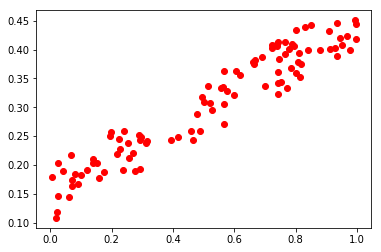

In [254]:
"""Scatter plot of x1 vs y"""
plt.plot(x_data[[0]].tolist()[0], y_data.tolist()[0], 'ro')
plt.show()

In [0]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1,2],-1,1))

y = tf.matmul([W], x_data) + b
loss = tf.reduce_mean(tf.square(y - y_data))

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

In [256]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
n = 500
for step in range(n):
  sess.run(train)
  if step == 0:
    W_pred = sess.run(W)
    b_pred = sess.run(b)
    y_init = np.dot([W_pred], x_data) + b_pred
    print("Step: ", step, "|| W = ", W_pred[0], "|| b = ", b_pred[0])
  elif step == (n-1):
    W_pred = sess.run(W)
    b_pred = sess.run(b)
    y_pred = np.dot([W_pred], x_data) + b_pred
    print("Step: ", step, "|| W = ", W_pred[0], "|| b = ", b_pred[0])
  elif step%20 == 0:
    print("Step: ", step)

Step:  0 || W =  [-0.9050701  0.5556371] || b =  0.11472869
Step:  20
Step:  40
Step:  60
Step:  80
Step:  100
Step:  120
Step:  140
Step:  160
Step:  180
Step:  200
Step:  220
Step:  240
Step:  260
Step:  280
Step:  300
Step:  320
Step:  340
Step:  360
Step:  380
Step:  400
Step:  420
Step:  440
Step:  460
Step:  480
Step:  499 || W =  [ 0.2997553  -0.09932766] || b =  0.19978485


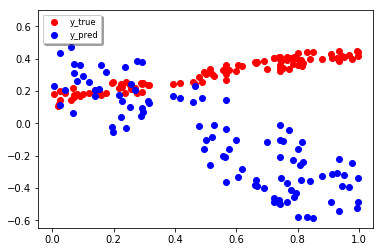

In [257]:
"""Scatter plot of x1 vs y prediction with the initialization value of the parameter"""
plt.plot(x_data[[0]].tolist()[0], y_data.tolist()[0], 'ro', label = 'y_true')
plt.plot(x_data[[0]].tolist()[0], y_init[0].tolist()[0], 'bo', label = 'y_pred')

plt.legend(loc='upper left', shadow=True, fontsize='small')

plt.show()

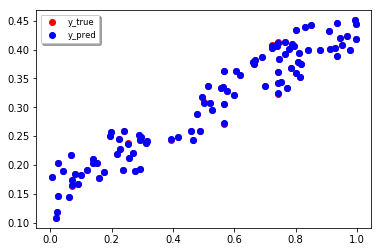

In [258]:
"""Scatter plot of x1 vs y prediction with the converged parameter"""
plt.plot(x_data[[0]].tolist()[0], y_data.tolist()[0], 'ro', label = 'y_true')
plt.plot(x_data[[0]].tolist()[0], y_pred[0].tolist()[0], 'bo', label = 'y_pred')

plt.legend(loc='upper left', shadow=True, fontsize='small')

plt.show()